<a href="https://colab.research.google.com/github/NishithaS28/Stock-Price-Prediction-Using-LSTM/blob/main/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

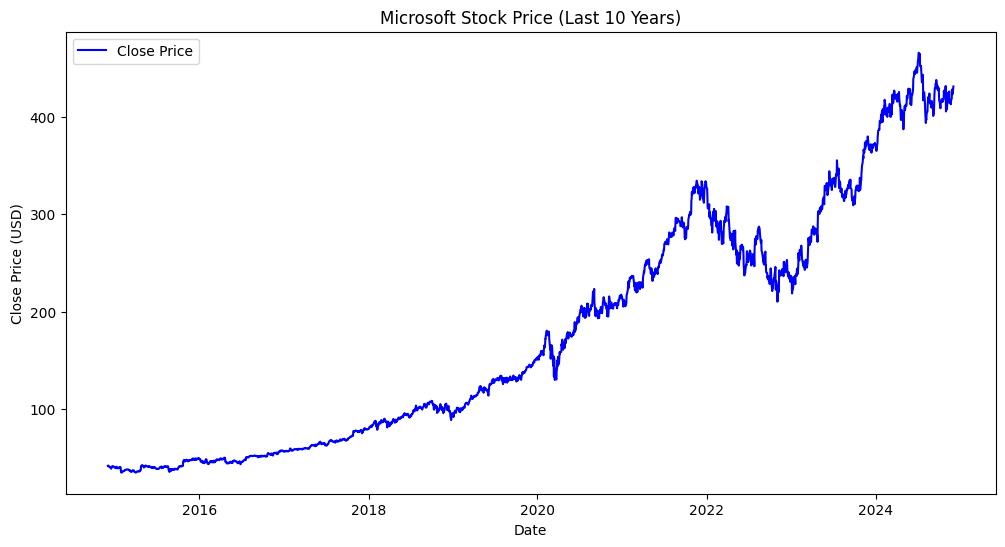

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0168
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 2.3356e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.0351e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.9736e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.8121e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.3931e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.0641e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1.6932e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.5308e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.6956e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


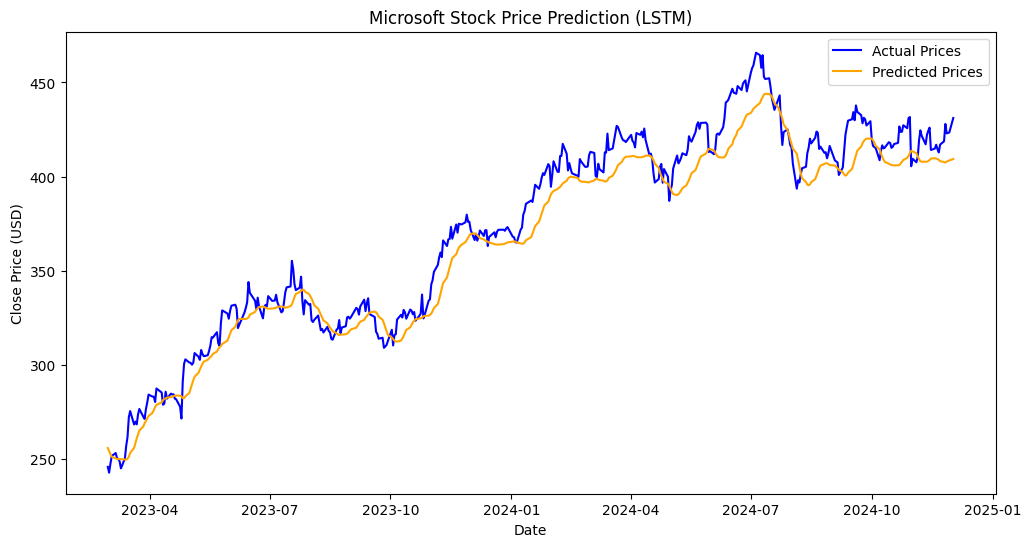

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

# Step 1: Fetch Data
ticker = "MSFT"  # Change this if needed
data = yf.Ticker(ticker).history(period="10y")
data = data[['Close']]  # Use only the closing price

# Save the raw data as a CSV (optional for reproducibility)
data.to_csv("msft_10y_data.csv")

# Remove timezone information from the Date index
data.index = data.index.tz_localize(None)

# Save the enhanced dataset
data.to_excel("msft_with_indicators.xlsx", engine="openpyxl")

# Step 2: Exploratory Data Analysis (EDA)
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Close Price", color="blue")
plt.title("Microsoft Stock Price (Last 10 Years)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.savefig("closing_price.png")  # Save the plot
plt.show()

# Step 3: Data Preprocessing for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

# Function to create sequences
def create_sequences(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(x), np.array(y)

time_step = 60
x_train, y_train = create_sequences(train_data, time_step)
x_test, y_test = create_sequences(test_data, time_step)

# Reshape data for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

from tensorflow.keras.layers import Input

# Step 4: Build the LSTM Model
model = Sequential([
    Input(shape=(time_step, 1)),  # Use Input layer instead of input_shape in LSTM layer
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])


# Compile and train the model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Step 5: Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(data.index[training_size + time_step:], y_test, label="Actual Prices", color="blue")
plt.plot(data.index[training_size + time_step:], predictions, label="Predicted Prices", color="orange")
plt.title("Microsoft Stock Price Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.savefig("lstm_predictions.png")  # Save the plot
plt.show()

# Save final data with predictions
final_data = data.copy()
final_data['Predictions'] = np.nan
final_data.iloc[training_size + time_step:, final_data.columns.get_loc('Predictions')] = predictions.flatten()
final_data.to_excel("msft_with_predictions.xlsx", engine="openpyxl")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 162.6946763277635
Mean Absolute Error: 10.393992655986064
R² Score: 0.9437646131943801


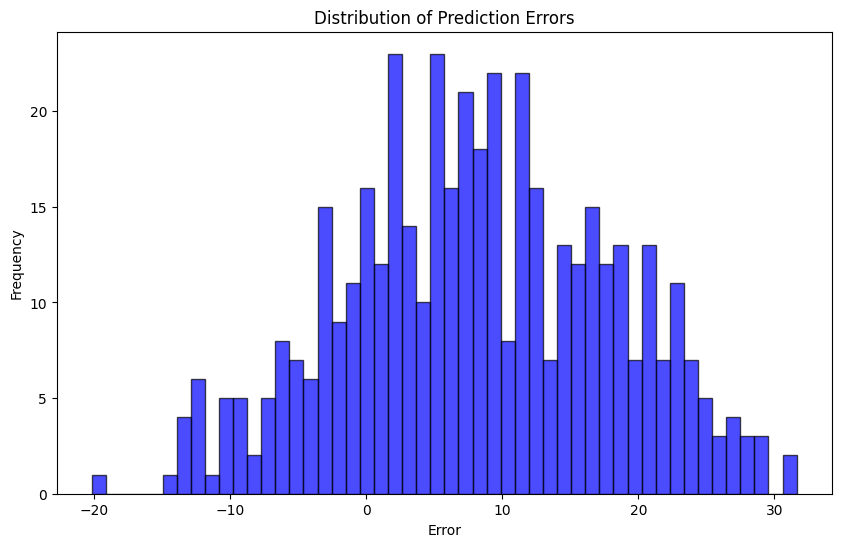

In [ ]:
import matplotlib.pyplot as plt

# Calculate prediction errors
errors = y_test - predictions

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.savefig("error_distribution.png")
plt.show()


In [ ]:
# Replace with your GitHub repository URL
!git clone https://github.com/YourUsername/Stock-Price-Prediction-Using-LSTM.git


Cloning into 'Stock-Price-Prediction-Using-LSTM'...
fatal: could not read Username for 'https://github.com': No such device or address
